# Final Project Report

* Class: DS 5100
* Student Name: Will Sivolella
* Student Net ID: wjs3jc
* This URL: a URL to the notebook source of this document

# Instructions

Follow the instructions in the [Final Project](https://ontoligent.github.io/DS5100-2023-07-R/notebooks/M00_FinalProject/FinalProjectInstructions.html) isntructions and put your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL:

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
# e.g. import montecarlo.montecarlo 
import montecarlo
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
help(montecarlo)

Help on module montecarlo:

NAME
    montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(g_obj)
     |  
     |  The Analyzer class is used to create Analyzer objects, which take the results of a single game and computes various descriptive statistical properties about it.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, g_obj)
     |      The __init__ method take thes argument g_obj and instantiates objects of the Analyzer class
     |  
     |  combo_count(self)
     |      The combo_count method computes the distinct combinations of faces rolled, along with their counts and returns a dataframe of the results
     |  
     |  fc_roll(self)
     |      The fc_roll method computes how many times a given face is rolled in each event and returns the result as a dataframe
     |  
     |  jackpot(self)
     |      The jackpot method takes no arguments and return the integer count 

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/WillSivolella/wjs3jc_ds5100_montecarlo/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [28]:
coin_face = np.array([1,2])
fair_coin = Die(faces = coin_face)

unfair_coin = Die(faces = coin_face)
unfair_coin.set_weight(1, 5.0)

print("Fair Coin: \n", fair_coin.get_df())
print("\nUnfair Coin: \n", unfair_coin.get_df())

Fair Coin: 
    weight
1     1.0
2     1.0

Unfair Coin: 
    weight
1     5.0
2     1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [29]:
d_list = [fair_coin, fair_coin]

g_obj1 = Game(d_list)
g_obj1.play(1000)
g_obj1.get_recent_play()

,Object 1,Object 2
0,2,1
1,2,1
2,2,1
3,2,2
4,1,1
...,...,...
995,2,1
996,2,2
997,2,2
998,1,2


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [30]:
d_list = [fair_coin, unfair_coin, unfair_coin]

g_obj2 = Game(d_list)
g_obj2.play(1000)
g_obj2.get_recent_play()

,Object 1,Object 2,Object 3
0,1,1,1
1,2,1,1
2,2,1,1
3,1,1,1
4,2,1,2
...,...,...,...
995,2,1,1
996,1,1,1
997,2,1,1
998,2,1,1


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [31]:
a_obj1 = Analyzer(g_obj1)
print("Number of jackpots for first game object: ", a_obj1.jackpot())
a_obj2 = Analyzer(g_obj2)
print("Number of jackpots for second game object: ", a_obj2.jackpot())

Number of jackpots for first game object:  507
Number of jackpots for second game object:  339


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [32]:
print("Relative frequency of jackpots for first game object: ", float(a_obj1.jackpot())/1000)
print("Relative frequency of jackpots for second game object: ", float(a_obj2.jackpot())/1000)

Relative frequency of jackpots for first game object:  0.507
Relative frequency of jackpots for second game object:  0.339


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

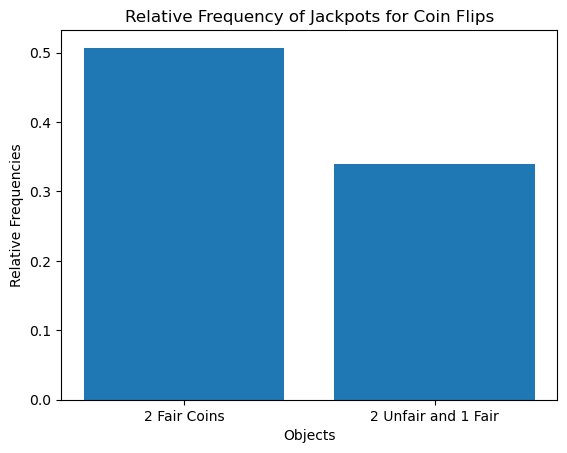

In [33]:
cols = ["2 Fair Coins", "2 Unfair and 1 Fair"]
vals = [float(a_obj1.jackpot())/1000, float(a_obj2.jackpot())/1000]
plt.bar(cols, vals)
plt.xlabel('Objects')
plt.ylabel('Relative Frequencies')
plt.title('Relative Frequency of Jackpots for Coin Flips')
plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [34]:
die_face = np.array([1,2,3,4,5,6])

die1 = Die(faces = die_face)
die2 = Die(faces = die_face)
die3 = Die(faces = die_face)

print("Die 1: \n", die1.get_df())
print("\nDie 2: \n", die2.get_df())
print("\nDie 3: \n", die3.get_df())

Die 1: 
    weight
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0

Die 2: 
    weight
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0

Die 3: 
    weight
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0


Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [35]:
die3.set_weight(6,5.0)
print("Die 3: \n", die3.get_df())

Die 3: 
    weight
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [36]:
die2.set_weight(1,5.0)
print("Die 3: \n", die2.get_df())

Die 3: 
    weight
1     5.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [45]:
d_list = [die1, die1, die1, die1, die1]

g_obj1 = Game(d_list)
g_obj1.play(10000)
g_obj1.get_recent_play()

,Object 1,Object 2,Object 3,Object 4,Object 5
0,2,6,2,5,2
1,4,1,6,3,2
2,6,6,3,2,4
3,4,4,4,3,5
4,1,3,2,3,3
...,...,...,...,...,...
9995,1,2,1,3,3
9996,5,2,1,3,4
9997,5,3,4,4,2
9998,5,3,2,3,4


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [47]:
d_list = [die2, die3, die1, die1, die1]

g_obj2 = Game(d_list)
g_obj2.play(10000)
g_obj2.get_recent_play()

,Object 1,Object 2,Object 3,Object 4,Object 5
0,1,1,3,5,1
1,1,6,2,4,4
2,3,1,1,4,1
3,1,6,5,1,1
4,1,4,4,2,4
...,...,...,...,...,...
9995,2,6,5,2,5
9996,6,6,5,5,3
9997,1,3,4,2,2
9998,1,1,5,1,4


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

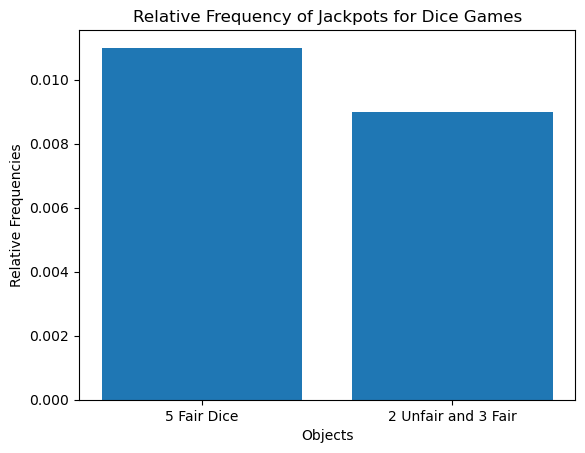

In [48]:
a_obj1 = Analyzer(g_obj1)
a_obj2 = Analyzer(g_obj2)
cols = ["5 Fair Dice", "2 Unfair and 3 Fair"]
vals = [float(a_obj1.jackpot())/1000, float(a_obj2.jackpot())/1000]
plt.bar(cols, vals)
plt.xlabel('Objects')
plt.ylabel('Relative Frequencies')
plt.title('Relative Frequency of Jackpots for Dice Games')
plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [49]:
df = pd.read_csv("english_letters.txt", header = None)

letters = []
counts = []
for i in range(len(df[0])):
    letters.append(df[0][i].split(" ")[0])
    counts.append(df[0][i].split(" ")[1])

letters_arr = np.array(letters)

die_obj1 = Die(faces = letters_arr)

for i in range(len(df[0])):
    die_obj1.set_weight(letters[i], counts[i])

die_obj1.get_df()

,weight
E,529117365.0
T,390965105.0
A,374061888.0
O,326627740.0
I,320410057.0
N,313720540.0
S,294300210.0
R,277000841.0
H,216768975.0
L,183996130.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [50]:
d_list = [die_obj1, die_obj1, die_obj1, die_obj1]

g_obj1 = Game(d_list)
g_obj1.play(1000)
g_obj1.get_recent_play()

,Object 1,Object 2,Object 3,Object 4
0,O,R,I,C
1,T,O,R,T
2,E,M,D,G
3,E,Y,R,R
4,D,E,E,R
...,...,...,...,...
995,I,H,A,E
996,N,R,R,E
997,R,C,Y,S
998,S,E,D,W


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [51]:
df2 = pd.read_csv("scrabble_words.txt", header = None)

a_obj1 = Analyzer(g_obj1)
perm_df = list(a_obj1.perm_count().index)
count = 0

for i in perm_df: 
    a_index = ''.join(i)
    if a_index in list(df2[0]):
        count += 1
print(count)

36


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [52]:
d_list = [die_obj1, die_obj1, die_obj1, die_obj1, die_obj1]

g_obj2 = Game(d_list)
g_obj2.play(1000)

a_obj2 = Analyzer(g_obj2)
perm_df = list(a_obj2.perm_count().index)
count2 = 0

for i in perm_df: 
    a_index = ''.join(i)
    if a_index in list(df2[0]):
        count2 += 1
print(count2)

10


The game object with 4 dice produced more permutations that are actual words than the game object with 5 dice.  The game object with 4 dice produced 36 permutations that are actual words, and the game object with 5 dice produced 10 permuations that are actual words.

# Submission

When finished completing the above tasks, save this file to your local repo (and within your project), and them push it to your GitHub repo.

Then convert this file to a PDF and submit it to GradeScope according to the assignment instructions in Canvas.